In [1]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 6.5 MB/s 
     |████████████████████████████████| 112 kB 42.2 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 212 kB 55.9 MB/s 
     |████████████████████████████████| 84 kB 4.1 MB/s 
     |████████████████████████████████| 270 kB 55.3 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 2.3 MB 30.9 MB/s 
     |████████████████████████████████| 57 kB 5.3 MB/s 
     |████████████████████████████████| 55 kB 3.4 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 80 kB 8.6 MB/s 
     |████████████████████████████████| 68 kB 5.8 MB/s 
     |████████████████████████████████| 43 kB 1.0 MB/s 
     |████████████████████████████████| 856 kB 39.7 MB/s 
     |████████████████████████████████| 594 kB 46.

In [2]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn import tree # for decision tree models
from sklearn.metrics import confusion_matrix

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import graphviz # for plotting decision tree graphs

In [3]:
# Set Pandas options to display more columns
pd.options.display.max_columns=50

# Read in the diabetes data csv
df=pd.read_csv('diabetes.csv', encoding='utf-8')

# Drop records where target RainTomorrow=NaN
df=df[pd.isnull(df['Outcome'])==False]

# For other columns with missing values, fill them in with column mean
df=df.fillna(df.mean())


# Show a snaphsot of data
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f563c195790>,
      dtype=object)

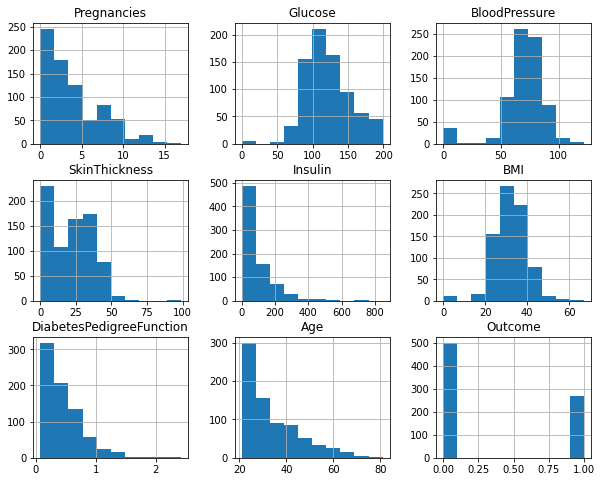

In [4]:
filt_df = df[0:8]
df.hist(figsize=(10,8))

In [5]:
#DATA SPLITTING
train, test = train_test_split(df, test_size = 0.4, random_state=30)
y_train = train["Outcome"]
X_train = train[train.columns[0:8]]
X_test  = test[test.columns[0:8]]
y_test  = test["Outcome"]
feat_names = train.columns[0:8]
target_classes = ['0','1'] 

#MODEL FITTING
model = tree.DecisionTreeClassifier(max_depth=4, random_state=0)
clf= model.fit(X_train,y_train)

In [28]:
import gradio as gr
def classify(pregnancy,glucose,bloodpressure,skinthickness,insulin,bmi,diabetes,age):
  X_test  = np.array([[pregnancy,glucose,bloodpressure,skinthickness,insulin,bmi,diabetes,age]])
  pred_labels_te = model.predict(X_test)
  if pred_labels_te==0:
    return "The person is non-diabetec"
  else:
    return "The person is Diabetic"


iface = gr.Interface(fn=classify, inputs=["text","text","text","text",
                                          "text","text","text","text"], outputs="text")
iface.launch()
#Pregnancies:0-17
#Glucose: 0-199 mg 
#BloodPressure: 0-122
#SkinThickness: 0-99
#Insulin: 0-846
#BMI: 0-67.1
#Diabetes: 0.078-2.42
#Age:21-81

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://24466.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f562c0cff50>,
 'http://127.0.0.1:7865/',
 'https://24466.gradio.app')

In [25]:
a = np.array([[6,148,72,35,0,33.6,0.627,50]])
pred_labels_te = model.predict(a)
print(pred_labels_te)

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [13]:
# Predict class labels on train and test data
pred_labels_tr = model.predict(X_train)
pred_labels_te = model.predict(X_test)
print(pred_labels_te)

[0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0
 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1
 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1
 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0
 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0
 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1
 1 0 0 1 0 1 0 0 0 1 0 0]
